In [ ]:
%load_ext autoreload
%autoreload 2

In [35]:
import matplotlib.pyplot as plt
import cv2
import os
import pprint

In [129]:
# note: this assumes that they all have the same structure
# trials_list should be a list of [trial folder name, label]
def plot_oowl_reconstructions(trials_list):
    # scanning the first trial folder, just to get all object names
    obj_list = []
    test_path = ("./output/{}/".format(trials_list[0][0]))
    for root, dirs, files in os.walk(test_path):
        for d in dirs:
            object_key = os.path.join(root,d).replace(test_path,"")
            if len(object_key.split('/')) == 2:
                obj_list.append(object_key)
                
    # plotting
    size = 5
    fig, axs = plt.subplots(len(obj_list), len(trials_list)+1, figsize = (len(trials_list)*size,len(obj_list)*size))
    for obj_idx in range(len(obj_list)):
        for trial_idx in range(-1, len(trials_list)):
            ax = axs[obj_idx, trial_idx+1]
            if trial_idx == -1:
                # the first image should be a plot of the input img. Note that this assumes all input images are the same for all trials
                # this should be true if they were all tested with the same seed
                input_img_path = "./output/{}/{}/input_0.jpg".format(trials_list[0][0], obj_list[obj_idx])
                input_img = cv2.imread(input_img_path, cv2.IMREAD_COLOR)
                ax.imshow(input_img, interpolation='lanczos')
                ax.set_title(obj_list[obj_idx])
            else:
                curr_rec_path = "./output/{}/{}/reconstructed.png".format(trials_list[trial_idx][0], obj_list[obj_idx])
                curr_rec_img = cv2.imread(curr_rec_path, cv2.IMREAD_COLOR)
                ax.imshow(curr_rec_img, interpolation='lanczos')
                ax.set_title(trials_list[trial_idx][1])
                
            ax.set_xticks([])
            ax.set_yticks([])


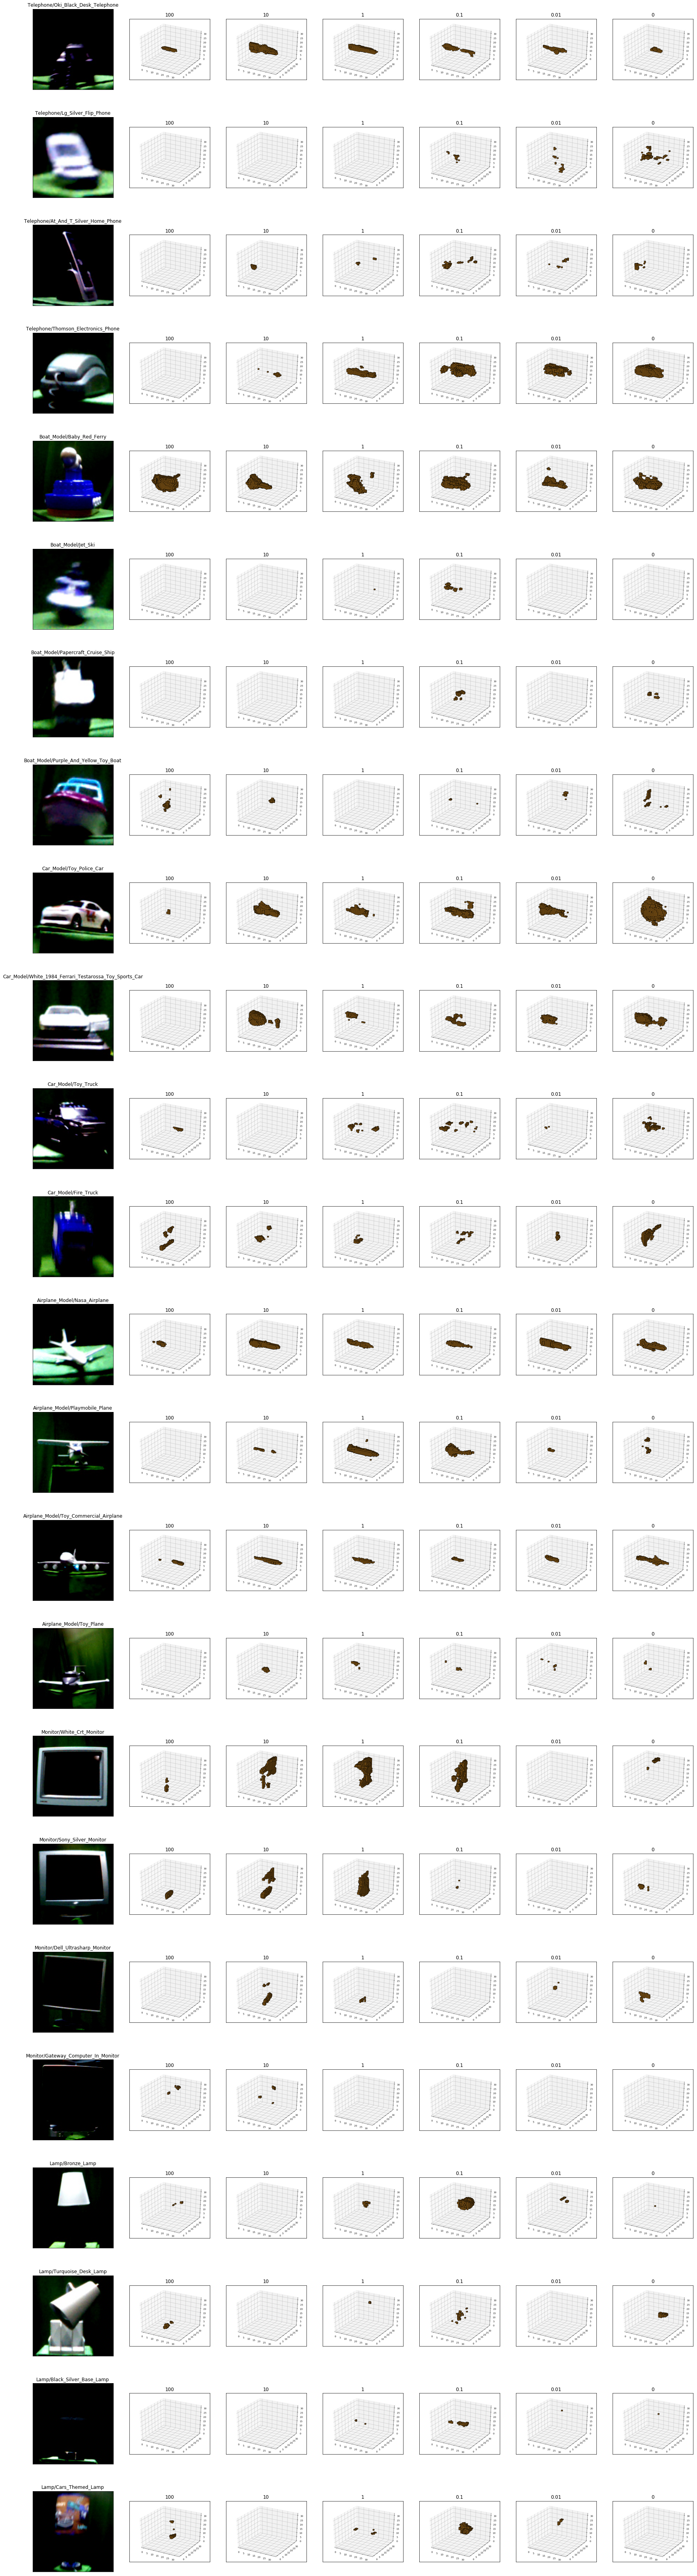

In [137]:
CORAL_trial_names_dict = {
    100: "2020_03_20--04_18_03_OOWL_DA_CORAL_lam_100_TEST",
    10: "2020_03_20--04_19_10_OOWL_DA_CORAL_lam_10_TEST",
    1: "2020_03_20--04_20_24_OOWL_DA_CORAL_lam_1_TEST",
    0.1: "2020_03_20--04_21_41_OOWL_DA_CORAL_lam_0.1_TEST",
    0.01: "2020_03_20--04_22_46_OOWL_DA_CORAL_lam_0.01_TEST",
    0: "2020_03_20--04_24_33_OOWL_DA_CORAL_lam_0_TEST"
}

CORAL_trials = [[CORAL_trial_names_dict[key], key]for key in CORAL_trial_names_dict]
plot_oowl_reconstructions(CORAL_trials)

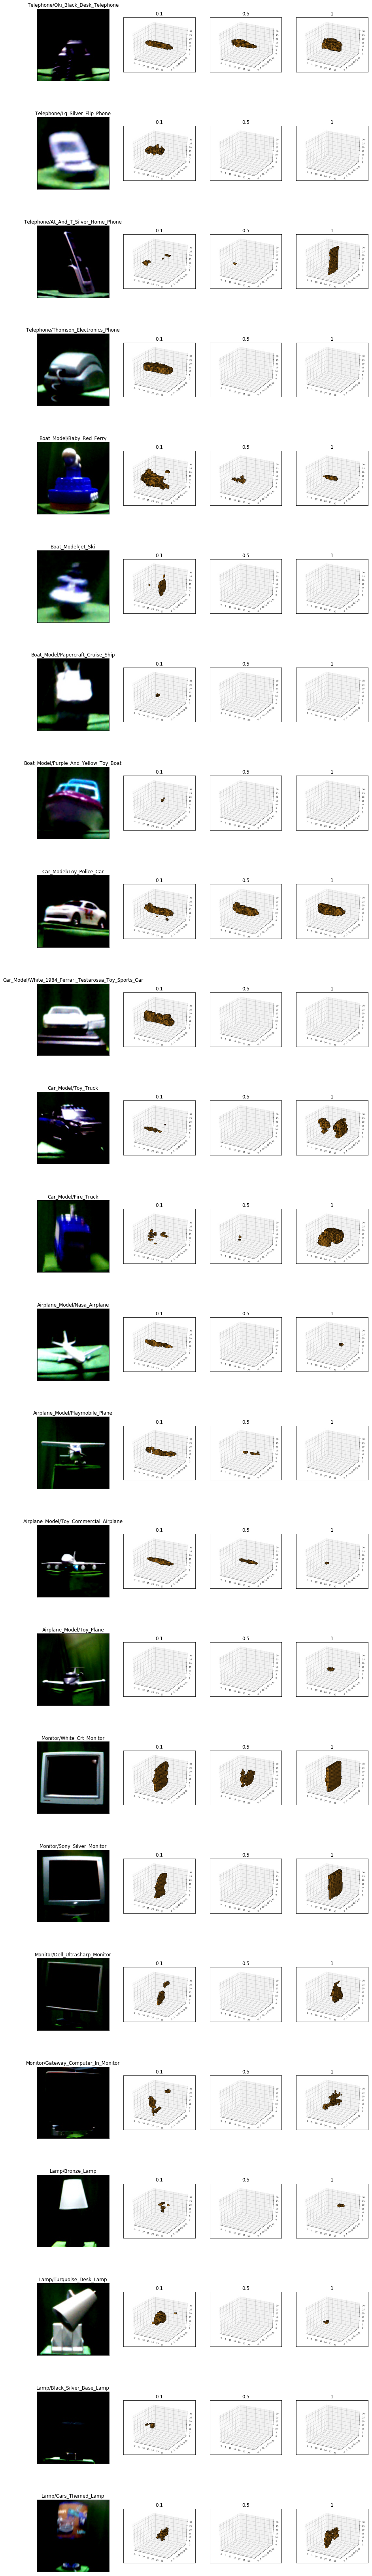

In [135]:
DANN_trials = [["2020_03_20--04_05_19_OOWL_DA_DANN_lam_0.1_TEST", 0.1],
               ["2020_03_20--04_06_47_OOWL_DA_DANN_lam_0.5_TEST", 0.5],
               ["2020_03_20--04_07_42_OOWL_DA_DANN_lam_1_TEST", 1],
              ]

plot_oowl_reconstructions(DANN_trials)